# Computer Vision CSCI-GA.2272-001 Assignment 1, part 1.

Fall 2021 semester.

Due date: **September 30th 2021.**

## Introduction

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

You should perform this assignment in PyTorch by modifying this ipython notebook (File-->Save a copy...).

To install PyTorch, follow instructions at http://pytorch.org/

Please submit your assignment by uploading this iPython notebook to Brightspace.

## Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

Paste the output into your report.
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Training a Multi-Layer Network on MNIST [10%]

- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

## Training a Convolutional Network on CIFAR [25%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may find training is faster if you use a GPU runtime (RunTime-->Change Runtime Type-->GPU). 

- Give a breakdown of the parameters within the above model, and the overall number.

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

# Warmup

In [5]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
dataset = "mnist"
def get_dataloader(dataset = "mnist"):
    if dataset == 'mnist':
        data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
        testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

    elif dataset == 'cifar10':
        data_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])
        trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
        testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
    test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
    return train_loader, test_loader

## Dataset Visulization

### mnist visulization

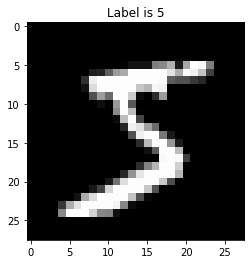

In [6]:
import matplotlib.pyplot as plt

# image index is within trainset
image_index = 0
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)

image, label = trainset[image_index]
image = image.reshape((28, 28))

# # Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(image, cmap='gray')
plt.show()

### cifar10 visulization

Files already downloaded and verified


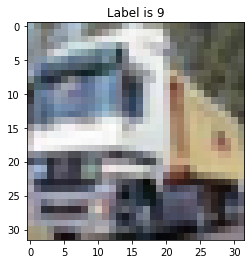

In [21]:
import matplotlib.pyplot as plt
import numpy as np
# image index is within trainset
image_index = 1

trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=None)
image, label = trainset[image_index]

# # Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(image)

# Training a Single Layer Network on MNIST

In [22]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
#   - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
#   - 2 by 2 max pooling (non-overlapping).
#   - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
#   - 2 by 2 max pooling (non-overlapping).
#   - Flatten to vector.
#   - Linear layer with 64 hidden units + Tanh nonlinearity.
#   - Linear layer to 10 output units.
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [23]:
def train(epoch, train_loader):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(test_loader):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


## Network Weight Visulization
(a): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. Grab a screenshot of the figure and include it in your report. (Hint threads: #1 #2 )

In [24]:
rain_loader, test_loader 
for epoch in range(50):
    train(epoch)

TypeError: train() missing 1 required positional argument: 'train_loader'

In [9]:
import visdom
visdom.image(network.linear.weight)

AttributeError: module 'visdom' has no attribute 'image'

## Train 50 Epoch
(b): Reduce the number of training examples to just 50. [Hint: limit the iterator in the train function]. Paste the output into your report and explain what is happening to the model.

In [10]:
for epoch in range(50):
    train(epoch)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.303359
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.478013
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.436842
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.341980
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.373091
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.212815
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.346881
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.213501
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.361849
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.331368
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.479575
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.311251
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.431315
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.331584
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.463623
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.490695
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.203455
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.350757
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.382515
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.283072
Train Epoch:

KeyboardInterrupt: 

In [ ]:
test()

#  Training a Multi-Layer Network on MNIST 

## (in,1000) (1000,10)
- Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class]. Train the model for 10 epochs and save the output into your report.

In [16]:
class MLP(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(MLP, self).__init__()
        self.net = nn.Sequential( nn.Linear(num_inputs, 1000), nn.Linear(1000, num_outputs))

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.net(input)
        return output

In [18]:
network = MLP(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [17]:
for epoch in range(50):
    train(epoch)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.351991
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.554521
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.382930
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.474488
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.361806
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.426693
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.370396
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.257200
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.370053
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.327832
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.288343
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.286894
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.320418
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.272572
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.599799
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.429267
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.322669
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.432354
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.383577
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.312381
Train Epoch:

KeyboardInterrupt: 

## learning_rata = 10
-  Now set the learning rate to 10 and observe what happens during training. Save the output in your report and give a brief explanation

In [ ]:
network = MLP(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=10)

In [ ]:
for epoch in range(50):
    train(epoch)

# Training a Convolutional Network on CIFAR
To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

Train it for 20 epochs on the CIFAR-10 training set and copy the output
into your report, along with a image of the first layer filters.

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(CNN, self).__init__()
        self.net = nn.Sequential( 
            nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(5,5)),
            nn.Tanh(),
            nn.MaxPool2d((2, 2)),
            nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(5,5)),
            nn.Tanh(),
            nn.MaxPool2d((2, 2)),
            nn.Flatten(1,-1),
            nn.Linear(75,64),
            nn.Tanh(),
            nn.Linear(64,10)
        )

    def forward(self, input):
        output = self.net(input)
        return output
    

In [82]:
network = CNN(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=0.01)
train_loader, test_loader = get_dataloader("cifar10")

Files already downloaded and verified
Files already downloaded and verified
